In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import os, sys

project_root = '/user_data/mmhender/featsynth/'
# sys.path.append(os.path.join(project_root, 'code'))
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt1, analyze_expt2

import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols


In [8]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt1.get_categ_info()

trial_data_all1, subjects1, subject_cb1, cue_level_names, image_type_names = analyze_expt1.load_data()
trial_data_all2, subjects2, subject_cb2, cue_level_names, image_type_names = analyze_expt2.load_data()
 
n_subjects1 = len(subjects1)
n_subjects2 = len(subjects2)

n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)
n_kinds = 2;

# expt 1 is color, 2 is grayscale
acc_by_nat1, dprime_by_nat1, propyes_by_nat1, rt_by_nat1 = analyze_expt1.get_perf_by_nat()
acc_by_nat2, dprime_by_nat2, propyes_by_nat2, rt_by_nat2 = analyze_expt2.get_perf_by_nat()



In [3]:
cue_level_colors = np.array([[93,192,219], [44,92,168]])/255
point_types = ['o','x']
markersize = 4;
xjitters = np.array([-0.2, 0.2])
barwidth = xjitters[1]*2

#### three way anova: naturalness x image type x color 

In [4]:
var1, var2, var3 = 'naturalness','image_type','color_cond'
model_str = 'value ~ C(%s) + C(%s) + C(%s)'%(var1, var2, var3)
model_str += ' + C(%s):C(%s)'%(var1, var2)
model_str += ' + C(%s):C(%s)'%(var1, var3)
model_str += ' + C(%s):C(%s)'%(var2, var3)
model_str += ' + C(%s):C(%s):C(%s)'%(var1, var2, var3)
model_str += ' + 1'
model_str

a_all = []

for cc in [0,1]:
    
    atab = []
    
    for ee, dvals in enumerate([dprime_by_nat1, dprime_by_nat2]):
    
        vals = dvals[:,cc,:,:]
    
        for ii in range(n_image_types):
            for kk in range(n_kinds):
                for ss in range(vals.shape[0]):
    
                    # [cue level, image type, color cond, value]
                    atab.append([kk,ii,ee,vals[ss,ii,kk]])
    
    df = pd.DataFrame(np.array(atab), columns=[var1, var2, var3, 'value'])
    
    model = ols(model_str, data = df).fit()
    
    a = anova_lm(model)

    a_all.append(a)

In [5]:
cc = 0;

print('%s task'%cue_level_names[cc])

a_all[cc]

basic task


,df,sum_sq,mean_sq,F,PR(>F)
C(naturalness),1.0,2.121565,2.121565,5.594381,1.824724e-02
C(image_type),4.0,340.189932,85.047483,224.262724,1.867871e-130
C(color_cond),1.0,66.653820,66.653820,175.760254,1.587924e-36
C(naturalness):C(image_type),4.0,10.434621,2.608655,6.878794,1.896188e-05
C(naturalness):C(color_cond),1.0,7.754721,7.754721,20.448517,7.017187e-06
C(image_type):C(color_cond),4.0,0.788884,0.197221,0.520055,7.210261e-01
C(naturalness):C(image_type):C(color_cond),4.0,2.590005,0.647501,1.707404,1.462843e-01
Residual,830.0,314.762122,0.379231,NaN,NaN


In [6]:
cc = 1;

print('%s task'%cue_level_names[cc])

a_all[cc]

super task


,df,sum_sq,mean_sq,F,PR(>F)
C(naturalness),1.0,96.945409,96.945409,246.924487,6.620217e-49
C(image_type),4.0,483.337072,120.834268,307.770528,2.909708e-162
C(color_cond),1.0,87.688441,87.688441,223.346557,6.721630e-45
C(naturalness):C(image_type),4.0,5.547837,1.386959,3.532650,7.204619e-03
C(naturalness):C(color_cond),1.0,3.281853,3.281853,8.359032,3.937932e-03
C(image_type):C(color_cond),4.0,2.416859,0.604215,1.538963,1.888973e-01
C(naturalness):C(image_type):C(color_cond),4.0,1.180742,0.295185,0.751851,5.568917e-01
Residual,830.0,325.867597,0.392612,NaN,NaN


#### three-way anova: cue level x image type x naturalness

In [7]:
var1, var2, var3 = 'cond','image_type','naturalness'
model_str = 'value ~ C(%s) + C(%s) + C(%s)'%(var1, var2, var3)
model_str += ' + C(%s):C(%s)'%(var1, var2)
model_str += ' + C(%s):C(%s)'%(var1, var3)
model_str += ' + C(%s):C(%s)'%(var2, var3)
model_str += ' + C(%s):C(%s):C(%s)'%(var1, var2, var3)
model_str += ' + 1'
model_str

a = []

for ee, [ename, dvals] in enumerate(zip(['color expt','grayscale expt'], \
                                           [dprime_by_nat1, dprime_by_nat2])):

    atab = []

    vals = dvals

    for cc in range(n_cue_levels):
        for ii in range(n_image_types):
            for kk in range(n_kinds):
                for ss in range(vals.shape[0]):

                    # [cue level, image type, color cond, value]
                    atab.append([cc,ii,kk,vals[ss,cc,ii,kk]])

    df = pd.DataFrame(np.array(atab), columns=[var1, var2, var3,'value'])

    model = ols(model_str, data = df).fit()

    a+= [anova_lm(model)]

In [8]:
print('color')
a[0]

color


,df,sum_sq,mean_sq,F,PR(>F)
C(cond),1.0,66.931233,66.931233,162.694732,1.988383e-34
C(image_type),4.0,430.613159,107.653290,261.680867,4.084128e-150
C(naturalness),1.0,65.870638,65.870638,160.116663,5.993407e-34
C(cond):C(image_type),4.0,10.267240,2.566810,6.239336,5.911292e-05
C(cond):C(naturalness),1.0,15.611681,15.611681,37.948475,1.084578e-09
C(image_type):C(naturalness),4.0,10.266361,2.566590,6.238802,5.916987e-05
C(cond):C(image_type):C(naturalness),4.0,4.877578,1.219394,2.964073,1.895616e-02
Residual,920.0,378.480199,0.411392,NaN,NaN


In [9]:
print('grayscale')
a[1]

grayscale


,df,sum_sq,mean_sq,F,PR(>F)
C(cond),1.0,38.627785,38.627785,109.039151,6.628966e-24
C(image_type),4.0,373.399704,93.349926,263.509715,1.089364e-140
C(naturalness),1.0,8.567330,8.567330,24.184002,1.079318e-06
C(cond):C(image_type),4.0,12.452644,3.113161,8.787882,6.202863e-07
C(cond):C(naturalness),1.0,20.053899,20.053899,56.608478,1.545725e-13
C(image_type):C(naturalness),4.0,3.137922,0.784480,2.214445,6.583829e-02
C(cond):C(image_type):C(naturalness),4.0,1.471344,0.367836,1.038333,3.864363e-01
Residual,740.0,262.149520,0.354256,NaN,NaN


#### paired t-tests for effect of natural vs artificial

In [10]:
n_color_conds = 2;
tvals = np.zeros((n_image_types, n_cue_levels, n_color_conds))
pvals = np.zeros((n_image_types, n_cue_levels, n_color_conds))

for ee, dvals in enumerate([dprime_by_nat1, dprime_by_nat2]):

    print('Experiment %d'%(ee+1))
    
    df = pd.DataFrame(index=image_type_names)

    for cc, cue in enumerate(cue_level_names):
        
        for ii in range(n_image_types):
            
            p, t = stats_utils.paired_ttest_nonpar(dvals[:,cc,ii,0], dvals[:,cc,ii,1])
            
            tvals[ii,cc,ee] = t
            pvals[ii,cc,ee] = p

        
    _, pvals_fdr = stats_utils.fdr_keepshape(pvals[:,:,ee], alpha=0.01, method='poscorr')
    
    for cc, cue in enumerate(cue_level_names):

        df['%s: t'%cue_level_names[cc]] = tvals[:,cc,ee].round(4)

        df['%s: p'%cue_level_names[cc]] = pvals_fdr[:,cc].round(4)

    print(df)

Experiment 1
       basic: t  basic: p  super: t  super: p
pool1   -2.2599    0.0500   -7.8647       0.0
pool2   -3.8825    0.0000   -5.3109       0.0
pool3   -6.7659    0.0000  -10.7359       0.0
pool4   -1.7445    0.0980   -8.0720       0.0
orig     2.0114    0.0511   -6.5740       0.0
Experiment 2
       basic: t  basic: p  super: t  super: p
pool1    0.7489    0.5750   -3.4738    0.0160
pool2    0.6162    0.6133   -3.3158    0.0160
pool3   -0.1860    0.8780   -4.2082    0.0000
pool4    1.1065    0.3257   -6.6035    0.0000
orig     2.8159    0.0160   -2.4374    0.0233


#### plot d-prime, all conds

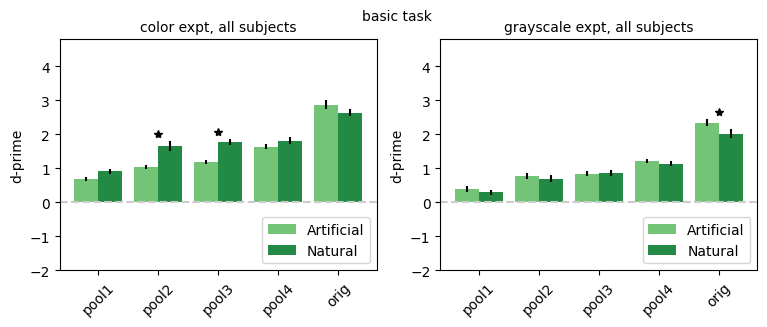

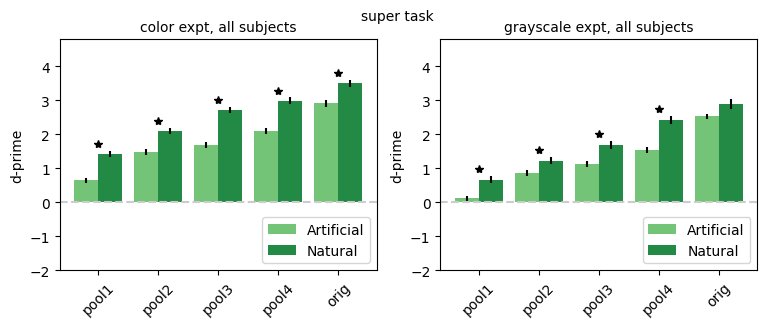

In [12]:
plot_utils.set_all_font_sizes(10)

nat_colors = cm.Greens(np.linspace(0,1,5))[[2,3],:]
n_kinds = 2
kind_names = ['Artificial','Natural']



for cc in [0,1]:
    
    plt.figure(figsize=(9,3))

    for ee, [ename, dvals, svals] in enumerate(zip(['color expt','grayscale expt'], \
                                               [dprime_by_nat1, dprime_by_nat2], \
                                               [subject_cb1, subject_cb2])):



        ax = plt.subplot(1,2,ee+1)

#         subjects_plot = (svals==cbi) 
        # n_subs_plot = np.sum(subjects_plot)
        vals = dvals[:,cc,:,:]
        n_subs_plot = vals.shape[0]
        
        plot_vals = vals;
        meanvals = np.mean(plot_vals, axis=0)
        semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])

        lh = []

        for kk in range(n_kinds):

#                 for si in range(n_subs_plot):

#                     h = plt.plot(np.arange(n_image_types)+xjitters[kk], \
#                                  plot_vals[si,:,kk],\
#                                  point_types[kk],color=[0.8, 0.8, 0.8], markerfacecolor='none', 
#                                 markersize=markersize)
                # lh.append(h[0])

            h = plt.bar(np.arange(n_image_types)+xjitters[kk], \
                             meanvals[:,kk], color=nat_colors[kk,:], width=barwidth)

            plt.errorbar(np.arange(n_image_types)+xjitters[kk], \
                             meanvals[:,kk], \
                             semvals[:,kk], \
                            color = 'k', linestyle='none')
            lh.append(h)

        for ii in range(n_image_types):
            if pvals[ii,cc,ee]<0.01:
                height = np.max(meanvals[ii,:]+semvals[ii,:])+0.20
                plt.plot(ii, height, '*', color='k')
    

        plt.title('%s, all subjects'%(ename))

        plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)


        plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

        ax.legend(lh, kind_names, loc='lower right')

        plt.ylabel('d-prime')

        plt.ylim([-2, 4.8])

    plt.suptitle('%s task'%(cue_level_names[cc]))

#### RT: paired t-tests for effect of natural vs artificial

In [5]:
n_color_conds = 2;
tvals = np.zeros((n_image_types, n_cue_levels, n_color_conds))
pvals = np.zeros((n_image_types, n_cue_levels, n_color_conds))

for ee, dvals in enumerate([rt_by_nat1, rt_by_nat2]):

    print('Experiment %d'%(ee+1))
    
    df = pd.DataFrame(index=image_type_names)

    for cc, cue in enumerate(cue_level_names):
        
        for ii in range(n_image_types):
            
            p, t = stats_utils.paired_ttest_nonpar(dvals[:,cc,ii,0], dvals[:,cc,ii,1])
            
            tvals[ii,cc,ee] = t
            pvals[ii,cc,ee] = p

        
    _, pvals_fdr = stats_utils.fdr_keepshape(pvals[:,:,ee], alpha=0.01, method='poscorr')
    
    for cc, cue in enumerate(cue_level_names):

        df['%s: t'%cue_level_names[cc]] = tvals[:,cc,ee].round(4)

        df['%s: p'%cue_level_names[cc]] = pvals_fdr[:,cc].round(4)

    print(df)

Experiment 1
       basic: t  basic: p  super: t  super: p
pool1   -1.6084    0.1178    0.2812     0.782
pool2    3.4543    0.0000    4.2269     0.000
pool3    4.6220    0.0000    6.8351     0.000
pool4    3.5088    0.0025    4.7527     0.000
orig     6.0490    0.0000    6.6636     0.000
Experiment 2
       basic: t  basic: p  super: t  super: p
pool1   -1.6972    0.2667   -1.5114     0.320
pool2   -0.8547    0.4600    0.1498     0.856
pool3   -0.9995    0.4600   -0.1529     0.856
pool4    1.1359    0.4600    2.8466     0.040
orig    -0.9005    0.4600    4.6510     0.000


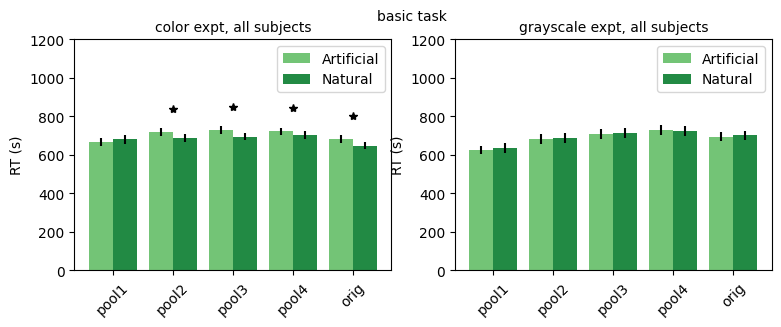

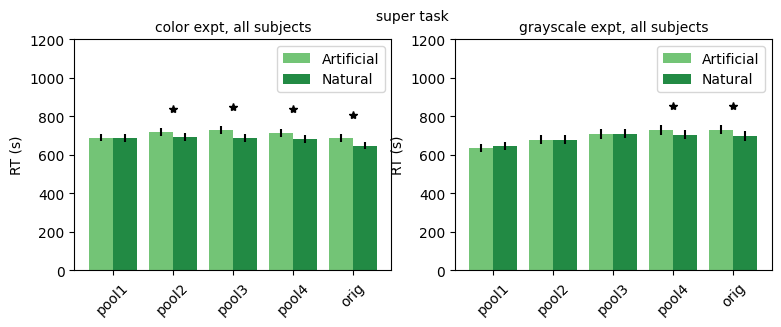

In [7]:
plot_utils.set_all_font_sizes(10)

nat_colors = cm.Greens(np.linspace(0,1,5))[[2,3],:]
n_kinds = 2
kind_names = ['Artificial','Natural']



for cc in [0,1]:
    
    plt.figure(figsize=(9,3))

    for ee, [ename, rtvals, svals] in enumerate(zip(['color expt','grayscale expt'], \
                                               [rt_by_nat1, rt_by_nat2], \
                                               [subject_cb1, subject_cb2])):



        ax = plt.subplot(1,2,ee+1)

#         subjects_plot = (svals==cbi) 
        # n_subs_plot = np.sum(subjects_plot)
        vals = rtvals[:,cc,:,:]
        n_subs_plot = vals.shape[0]
        
        plot_vals = vals;
        meanvals = np.mean(plot_vals, axis=0)
        semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])

        lh = []

        for kk in range(n_kinds):

#                 for si in range(n_subs_plot):

#                     h = plt.plot(np.arange(n_image_types)+xjitters[kk], \
#                                  plot_vals[si,:,kk],\
#                                  point_types[kk],color=[0.8, 0.8, 0.8], markerfacecolor='none', 
#                                 markersize=markersize)
                # lh.append(h[0])

            h = plt.bar(np.arange(n_image_types)+xjitters[kk], \
                             meanvals[:,kk], color=nat_colors[kk,:], width=barwidth)

            plt.errorbar(np.arange(n_image_types)+xjitters[kk], \
                             meanvals[:,kk], \
                             semvals[:,kk], \
                            color = 'k', linestyle='none')
            lh.append(h)

        for ii in range(n_image_types):
            if pvals[ii,cc,ee]<0.01:
                height = np.max(meanvals[ii,:]+semvals[ii,:])+100
                plt.plot(ii, height, '*', color='k')
    

        plt.title('%s, all subjects'%(ename))

        plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)


        # plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

        ax.legend(lh, kind_names, loc='upper right')

        plt.ylabel('RT (s)')

        plt.ylim([0, 1200])

    plt.suptitle('%s task'%(cue_level_names[cc]))

#### group trials according to whether the cue was natural/artifical
irrespective of actual viewed image


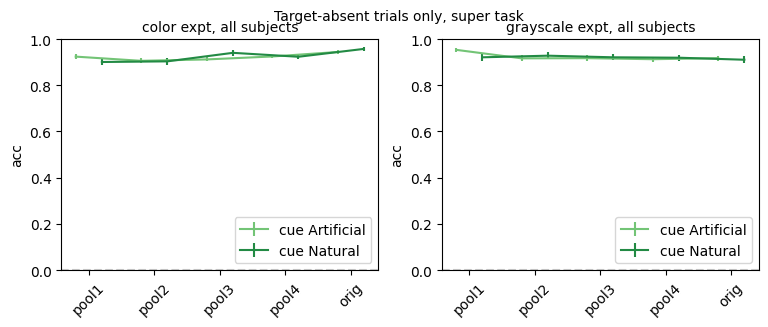

In [13]:
acc_by_cued_nat1, dprime_by_cued_nat1, propyes_by_cued_nat1, acc_absent_by_cued1 = analyze_expt1.get_perf_by_cued_nat()
acc_by_cued_nat2, dprime_by_cued_nat2, propyes_by_cued_nat2, acc_absent_by_cued2 = analyze_expt2.get_perf_by_cued_nat()


plot_utils.set_all_font_sizes(10)

nat_colors = cm.Greens(np.linspace(0,1,5))[[2,3],:]
n_kinds = 2
kind_names = ['Artificial','Natural']

for cc in [1]:
    
    plt.figure(figsize=(9,3))

    for ee, [ename, avals, svals] in enumerate(zip(['color expt','grayscale expt'], \
                                               [acc_absent_by_cued1, acc_absent_by_cued2], \
                                               [subject_cb1, subject_cb2])):



        ax = plt.subplot(1,2,ee+1)

#         subjects_plot = (svals==cbi) 
        # n_subs_plot = np.sum(subjects_plot)
        vals = avals[:,cc,:,:]
        n_subs_plot = vals.shape[0]
        
        plot_vals = vals;
        meanvals = np.mean(plot_vals, axis=0)
        semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])

        lh = []

        for kk in range(n_kinds):

#                 for si in range(n_subs_plot):

#                     h = plt.plot(np.arange(n_image_types)+xjitters[kk], \
#                                  plot_vals[si,:,kk],\
#                                  point_types[kk],color=[0.8, 0.8, 0.8], markerfacecolor='none', 
#                                 markersize=markersize)
                # lh.append(h[0])

            h = plt.errorbar(np.arange(n_image_types)+xjitters[kk], \
                             meanvals[:,kk], \
                             semvals[:,kk], \
                            color = nat_colors[kk,:])
            lh.append(h)

        plt.title('%s, all subjects'%(ename))

        plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)


        plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

        ax.legend(lh, ['cue %s'%kk for kk in kind_names], loc='lower right')

        plt.ylabel('acc')

        plt.ylim([0,1])

    plt.suptitle('Target-absent trials only, %s task'%(cue_level_names[cc]))